15
fit1:  [  0.52477051 -27.48524239]
[  0.31857003 -26.30626624   0.37300129   1.64869717] 0.32540562484057356
[  0.31872055 -20.35759314   0.31798212  -6.72609567   1.31896773] 1.187971253276836


np.float64(-20.357593143619265)

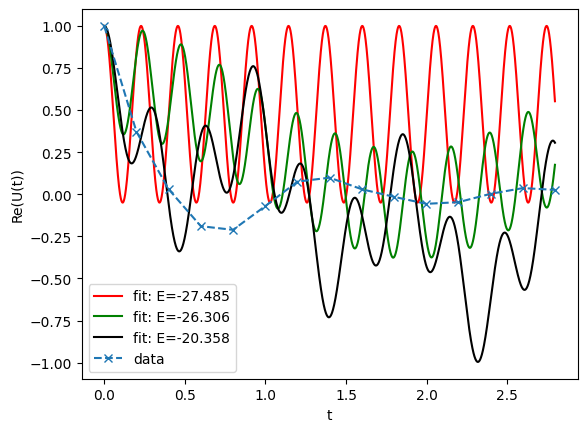

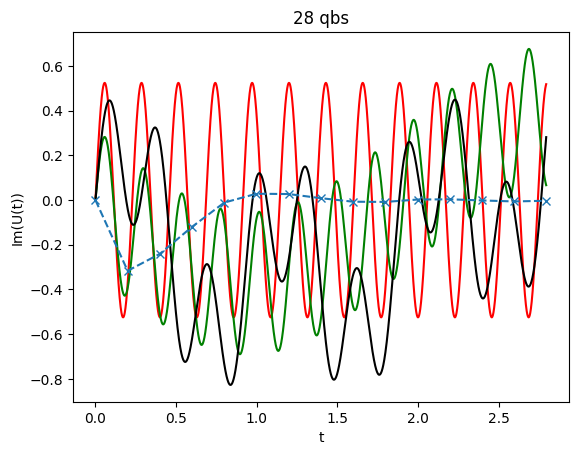

In [ ]:
import numpy as np
from scipy.optimize import curve_fit,least_squares
import matplotlib.pyplot as plt
import numpy as np

def model_func(x, r, theta):
    return complex(r * np.cos(theta*x) + 1-r , -r*np.sin(theta*x ))

def model_func2(x, r, theta,r2,theta2):
    return complex(r * np.cos(theta*x) + r2*np.cos(theta2*x)+ (1-r-r2) , -r*np.sin(theta*x )-r2*np.sin(theta2*x ))

def model_func3(x, r, theta,r2,theta2,theta3):
    return complex(r * np.cos(theta*x) + r2*np.cos(theta2*x)+ (1-r-r2)*np.cos(theta3*x) , -r*np.sin(theta*x )-r2*np.sin(theta2*x )-(1-r-r2)*np.sin(theta3*x))


def residual_func(params,y,x):
    r,theta= params
    diff = [model_func(x[k],r,theta) - y[k] for k in range(len(x))]
    return [k.real**2 + k.imag**2 for k in diff]

def residual_func2(params,y,x):
    r,theta,r2,theta2= params
    diff = [model_func2(x[k],r,theta,r2,theta2) - y[k] for k in range(len(x))]
    return [k.real**2 + k.imag**2 for k in diff]

def residual_func3(params,y,x):
    r,theta,r2,theta2,theta3= params
    diff = [model_func3(x[k],r,theta,r2,theta2,theta3) - y[k] for k in range(len(x))]
    return [k.real**2 + k.imag**2 for k in diff]

def fit(x_points,y_points,alpha):
    res_x=[]
    res_cost=[]
    for E in np.arange(-0.5,-40.,-.1):
        p0 = np.array([1.,E])
        result = least_squares(residual_func,p0,args=(y_points,x_points),bounds=([0.,-np.inf],[1,0.]))

        res_x.append(result.x)
        res_cost.append(result.cost)

    x_best = res_x[res_cost.index(min(res_cost))]
    print("fit1: ",x_best)



    p0 = np.array([x_best[0],x_best[1],1-x_best[0],0.*x_best[1]])
    bounds= ([0.,-np.inf,0.,-alpha*abs(x_best[1])-eps],[1,0.,abs(x_best[0])+eps,alpha*abs(x_best[1])+eps])

    # print(p0,bounds)
    for counter in range(len(p0)):
        if p0[counter]<bounds[0][counter]:
            p0[counter] = bounds[0][counter]
        if p0[counter]>bounds[1][counter]:
            p0[counter] = bounds[1][counter]
    result2 = least_squares(residual_func2,p0,args=(y_points,x_points),bounds=bounds)
    print(result2.x,result2.cost)

    p0 = np.array([x_best[0],x_best[1],1-x_best[0],0.5*x_best[1],0.5*result2.x[3]])
    bounds = ([0.,-np.inf,0.,-alpha*abs(x_best[1])-eps,-alpha*abs(result2.x[3])-eps],[1,0.,abs(x_best[0])+eps,alpha*abs(x_best[1])+eps,alpha*abs(result2.x[3])+eps])
    for counter in range(len(p0)):
        if p0[counter]<bounds[0][counter]:
            p0[counter] = bounds[0][counter]
        if p0[counter]>bounds[1][counter]:
            p0[counter] = bounds[1][counter]
    result3 = least_squares(residual_func3,p0,args=(y_points,x_points),bounds=bounds)
    print(result3.x,result3.cost)

    plt.plot(np.arange(0,x_points[-1],0.001), [model_func(x,x_best[0],x_best[1]).real for x in np.arange(0,x_points[-1],0.001)], 'r-', label='fit: E=%5.3f' % x_best[1])
    plt.plot(np.arange(0,x_points[-1],0.001), [model_func2(x,result2.x[0],result2.x[1],result2.x[2],result2.x[3]).real for x in np.arange(0,x_points[-1],0.001)], 'g-', label='fit: E=%5.3f' % tuple(result2.x)[1])
    plt.plot(np.arange(0,x_points[-1],0.001), [model_func3(x,result3.x[0],result3.x[1],result3.x[2],result3.x[3],result3.x[4]).real for x in np.arange(0,x_points[-1],0.001)], 'k-', label='fit: E=%5.3f' % tuple(result3.x)[1])
    plt.plot(x_points,[x.real for x in y_points],marker="x", linestyle= "--",label="data")
    # plt.title("28 qbs")
    plt.xlabel("t")
    plt.ylabel("Re(U(t))")
    plt.legend()
    plt.figure()

    plt.plot(np.arange(0,x_points[-1],0.001), [model_func(x,x_best[0],x_best[1]).imag for x in np.arange(0,x_points[-1],0.001)], 'r-', label='fit: r=%5.3f, theta=%5.3f' % tuple(x_best))
    plt.plot(np.arange(0,x_points[-1],0.001), [model_func2(x,result2.x[0],result2.x[1],result2.x[2],result2.x[3]).imag for x in np.arange(0,x_points[-1],0.001)], 'g-', label='fit: r=%5.3f, theta=%5.3f,r2=%5.3f, theta2=%5.3f' % tuple(result2.x))
    plt.plot(np.arange(0,x_points[-1],0.001), [model_func3(x,result3.x[0],result3.x[1],result3.x[2],result3.x[3],result3.x[4]).imag for x in np.arange(0,x_points[-1],0.001)], 'k-', label='fit: r=%5.3f, theta=%5.3f,r2=%5.3f, theta2=%5.3f,theta3=%5.3f' % tuple(result3.x))
    plt.plot(x_points,[x.imag for x in y_points],marker="x", linestyle= "--")
    plt.title("28 qbs")
    plt.xlabel("t")
    plt.ylabel("Im(U(t))")
    return result3.x[1]


fitting_points = [(0.3720827906649302-0.3165370129184414j), (0.029981695941426967-0.24059276989686362j), (-0.18957900665282124-0.11943398218874302j), (-0.21134147629272415-0.01106163539723326j), (-0.07055862578760252+0.02860009152029286j), (0.07524024076877045+0.02714808687387804j), (0.09854271533668912+0.008676827765848882j), (0.029664894927663665-0.007136822837833123j), (-0.015294448942236638-0.008104825935443039j), (-0.05676898166074129+0.0025784082509063833j), (-0.04694815023408072+0.0036344116301172402j), (0.002807208983068854-0.0015224048716956373j), (0.036696117427575725-0.005940019008060848j), (0.02605688338202672-0.0028424090957090975j)]

delta_t = 1.9971283221559202e-01#0.3#2.727222373426687e-02
# fitting_points = [(0.888027888027888+0.3603393603393603j),(0.5944307944307945+0.61004641004641j),(0.21816921816921808+0.6716688716688717j),(-0.10365190365190369+0.5596463596463597j),(-0.3062685062685062+0.3361893361893362j),(-0.3524349524349525+0.09253029253029244j),(-0.2818412818412819-0.09461349461349466j),(-0.1475419475419475-0.1771435771435771j),(-0.009168609168609176-0.16510636510636512j),(0.07984627984627979-0.07720867720867719j),(0.08886788886788888+0.046422646422646485j),(0.02214662214662222+0.15328755328755328j),(-0.09859509859509863+0.19776559776559766j),(-0.2242844242844243+0.15907515907515912j),(-0.28694848694848696+0.0523866523866523j),(-0.2593376593376593-0.07489027489027489j),(-0.147021147021147-0.15068355068355066j),(-0.005413805413805428-0.14357714357714357j),(0.10882630882630884-0.0533442533442533j),(0.1382095382095383+0.06361746361746357j),(0.08948948948948954+0.1701547701547701j)]
y_points = [1.]+fitting_points[:]
x_points = [delta_t*x for x in range(0,len(y_points))]
print(len(x_points))
eps=1e-5
fit(x_points,y_points,alpha=0.8)

15
fit1:  [ 0.46398588 -3.99708177]
[ 0.30648623 -5.59243792  0.34412713 -1.73818871] 0.7782371716670284
[ 0.31674908 -2.27650578  0.26084856 -0.28845256  1.3905604 ] 0.754476247455269


np.float64(-2.276505782054553)

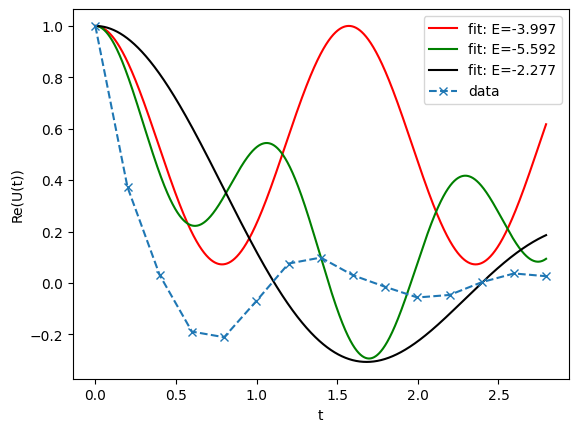

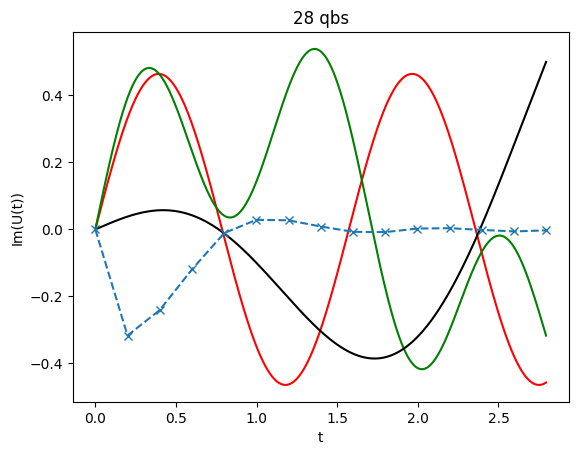

In [2]:
import numpy as np
from scipy.optimize import curve_fit,least_squares
import matplotlib.pyplot as plt
import numpy as np

def model_func(x, r, theta):
    return complex(r * np.cos(theta*x) + 1-r , -r*np.sin(theta*x ))

def model_func2(x, r, theta,r2,theta2):
    return complex(r * np.cos(theta*x) + r2*np.cos(theta2*x)+ (1-r-r2) , -r*np.sin(theta*x )-r2*np.sin(theta2*x ))

def model_func3(x, r, theta,r2,theta2,theta3):
    return complex(r * np.cos(theta*x) + r2*np.cos(theta2*x)+ (1-r-r2)*np.cos(theta3*x) , -r*np.sin(theta*x )-r2*np.sin(theta2*x )-(1-r-r2)*np.sin(theta3*x))


def residual_func(params,y,x):
    r,theta= params
    diff = [model_func(x[k],r,theta) - y[k] for k in range(len(x))]
    return [k.real**2 + k.imag**2 for k in diff]

def residual_func2(params,y,x):
    r,theta,r2,theta2= params
    diff = [model_func2(x[k],r,theta,r2,theta2) - y[k] for k in range(len(x))]
    return [k.real**2 + k.imag**2 for k in diff]

def residual_func3(params,y,x):
    r,theta,r2,theta2,theta3= params
    diff = [model_func3(x[k],r,theta,r2,theta2,theta3) - y[k] for k in range(len(x))]
    return [k.real**2 + k.imag**2 for k in diff]

def fit(x_points,y_points,alpha):
    res_x=[]
    res_cost=[]
    for E in np.arange(-0.5,-40.,-.1):
        p0 = np.array([1.,E])
        result = least_squares(residual_func,p0,args=(y_points,x_points),bounds=([0.,-np.inf],[1,0.]))

        if abs(2.*np.pi/(result.x[1]))>2.0*delta_t:
            res_x.append(result.x)
            res_cost.append(result.cost)

    x_best = res_x[res_cost.index(min(res_cost))]
    print("fit1: ",x_best)



    p0 = np.array([x_best[0],x_best[1],1-x_best[0],0.*x_best[1]])
    bounds= ([0.,-np.inf,0.,-alpha*abs(x_best[1])-eps],[1,0.,abs(x_best[0])+eps,alpha*abs(x_best[1])+eps])

    # print(p0,bounds)
    for counter in range(len(p0)):
        if p0[counter]<bounds[0][counter]:
            p0[counter] = bounds[0][counter]
        if p0[counter]>bounds[1][counter]:
            p0[counter] = bounds[1][counter]
    result2 = least_squares(residual_func2,p0,args=(y_points,x_points),bounds=bounds)
    print(result2.x,result2.cost)

    p0 = np.array([x_best[0],x_best[1],1-x_best[0],0.5*x_best[1],0.5*result2.x[3]])
    bounds = ([0.,-np.inf,0.,-alpha*abs(x_best[1])-eps,-alpha*abs(result2.x[3])-eps],[1,0.,abs(x_best[0])+eps,alpha*abs(x_best[1])+eps,alpha*abs(result2.x[3])+eps])
    for counter in range(len(p0)):
        if p0[counter]<bounds[0][counter]:
            p0[counter] = bounds[0][counter]
        if p0[counter]>bounds[1][counter]:
            p0[counter] = bounds[1][counter]
    result3 = least_squares(residual_func3,p0,args=(y_points,x_points),bounds=bounds)
    print(result3.x,result3.cost)

    plt.plot(np.arange(0,x_points[-1],0.001), [model_func(x,x_best[0],x_best[1]).real for x in np.arange(0,x_points[-1],0.001)], 'r-', label='fit: E=%5.3f' % x_best[1])
    plt.plot(np.arange(0,x_points[-1],0.001), [model_func2(x,result2.x[0],result2.x[1],result2.x[2],result2.x[3]).real for x in np.arange(0,x_points[-1],0.001)], 'g-', label='fit: E=%5.3f' % tuple(result2.x)[1])
    plt.plot(np.arange(0,x_points[-1],0.001), [model_func3(x,result3.x[0],result3.x[1],result3.x[2],result3.x[3],result3.x[4]).real for x in np.arange(0,x_points[-1],0.001)], 'k-', label='fit: E=%5.3f' % tuple(result3.x)[1])
    plt.plot(x_points,[x.real for x in y_points],marker="x", linestyle= "--",label="data")
    # plt.title("28 qbs")
    plt.xlabel("t")
    plt.ylabel("Re(U(t))")
    plt.legend()
    plt.figure()

    plt.plot(np.arange(0,x_points[-1],0.001), [model_func(x,x_best[0],x_best[1]).imag for x in np.arange(0,x_points[-1],0.001)], 'r-', label='fit: r=%5.3f, theta=%5.3f' % tuple(x_best))
    plt.plot(np.arange(0,x_points[-1],0.001), [model_func2(x,result2.x[0],result2.x[1],result2.x[2],result2.x[3]).imag for x in np.arange(0,x_points[-1],0.001)], 'g-', label='fit: r=%5.3f, theta=%5.3f,r2=%5.3f, theta2=%5.3f' % tuple(result2.x))
    plt.plot(np.arange(0,x_points[-1],0.001), [model_func3(x,result3.x[0],result3.x[1],result3.x[2],result3.x[3],result3.x[4]).imag for x in np.arange(0,x_points[-1],0.001)], 'k-', label='fit: r=%5.3f, theta=%5.3f,r2=%5.3f, theta2=%5.3f,theta3=%5.3f' % tuple(result3.x))
    plt.plot(x_points,[x.imag for x in y_points],marker="x", linestyle= "--")
    plt.title("28 qbs")
    plt.xlabel("t")
    plt.ylabel("Im(U(t))")
    return result3.x[1]


fitting_points = [(0.3720827906649302-0.3165370129184414j), (0.029981695941426967-0.24059276989686362j), (-0.18957900665282124-0.11943398218874302j), (-0.21134147629272415-0.01106163539723326j), (-0.07055862578760252+0.02860009152029286j), (0.07524024076877045+0.02714808687387804j), (0.09854271533668912+0.008676827765848882j), (0.029664894927663665-0.007136822837833123j), (-0.015294448942236638-0.008104825935443039j), (-0.05676898166074129+0.0025784082509063833j), (-0.04694815023408072+0.0036344116301172402j), (0.002807208983068854-0.0015224048716956373j), (0.036696117427575725-0.005940019008060848j), (0.02605688338202672-0.0028424090957090975j)]

delta_t = 1.9971283221559202e-01#0.3#2.727222373426687e-02
# fitting_points = [(0.888027888027888+0.3603393603393603j),(0.5944307944307945+0.61004641004641j),(0.21816921816921808+0.6716688716688717j),(-0.10365190365190369+0.5596463596463597j),(-0.3062685062685062+0.3361893361893362j),(-0.3524349524349525+0.09253029253029244j),(-0.2818412818412819-0.09461349461349466j),(-0.1475419475419475-0.1771435771435771j),(-0.009168609168609176-0.16510636510636512j),(0.07984627984627979-0.07720867720867719j),(0.08886788886788888+0.046422646422646485j),(0.02214662214662222+0.15328755328755328j),(-0.09859509859509863+0.19776559776559766j),(-0.2242844242844243+0.15907515907515912j),(-0.28694848694848696+0.0523866523866523j),(-0.2593376593376593-0.07489027489027489j),(-0.147021147021147-0.15068355068355066j),(-0.005413805413805428-0.14357714357714357j),(0.10882630882630884-0.0533442533442533j),(0.1382095382095383+0.06361746361746357j),(0.08948948948948954+0.1701547701547701j)]
y_points = [1.]+fitting_points[:]
x_points = [delta_t*x for x in range(0,len(y_points))]
print(len(x_points))
eps=1e-5
fit(x_points,y_points,alpha=0.8)

# New section